In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cols = ['AH', 'CC', 'GI', 'BQ', 'GH', 'DE', 'BR', 'EP', 'EL', 'CL', 'CD', 'AM', 'EU', 'FI', 'EE', 'CU', 'DU', 'GL', 'DL', 'DV']

df = pd.read_csv("../data/train.csv")
df.columns = df.columns.str.strip() # trim off whitespace from column names


df = df[cols + ['Class'] + ['Id']]

class1 = df[df['Class'] == 1]
class2 = df[df['Class'] == 0]

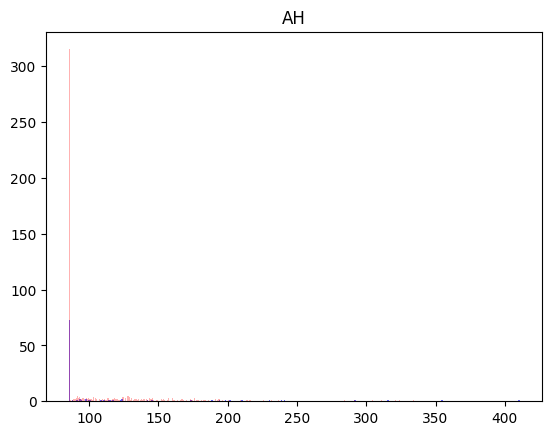

column:  AH
class 1 dropped: 249     514.858662
378    1237.940805
585     846.122895
Name: AH, dtype: float64
class 0 dropped: 52     1817.620554
184     589.729935
331    1910.123198
395     493.957062
566     399.229269
581     546.489750
616     546.663930
Name: AH, dtype: float64



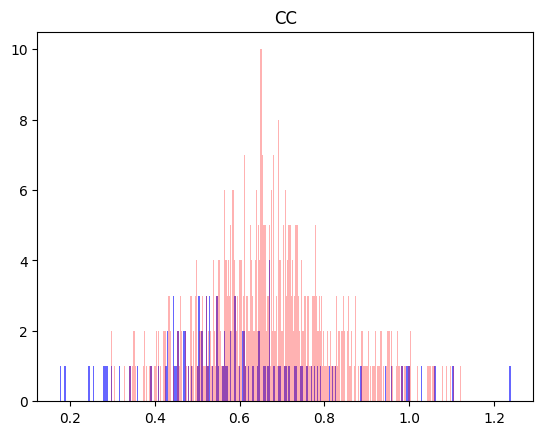

column:  CC
class 1 dropped: 155    2.084044
232    1.647773
378    4.103032
Name: CC, dtype: float64
class 0 dropped: 78     1.581573
106    1.142518
117    1.132206
184    1.194018
237    1.309600
242    1.129838
266    1.538831
329    1.144881
380    1.495144
426    3.241684
431    1.135872
497    1.380066
611    1.317070
Name: CC, dtype: float64



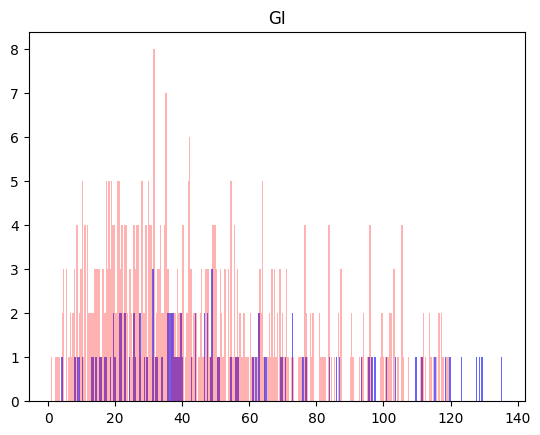

column:  GI
class 1 dropped: 76     151.326192
165    176.662964
189    139.826780
408    145.114812
486    157.079756
530    155.876060
Name: GI, dtype: float64
class 0 dropped: 63     150.356548
103    162.686716
106    151.171872
113    155.112176
135    162.185176
174    124.183876
194    122.301172
201    184.723612
205    191.194764
251    134.109224
280    159.638896
291    125.080218
360    158.211436
374    166.292660
419    148.401828
438    152.146660
474    145.230552
565    164.309648
610    133.988340
613    124.808872
Name: GI, dtype: float64



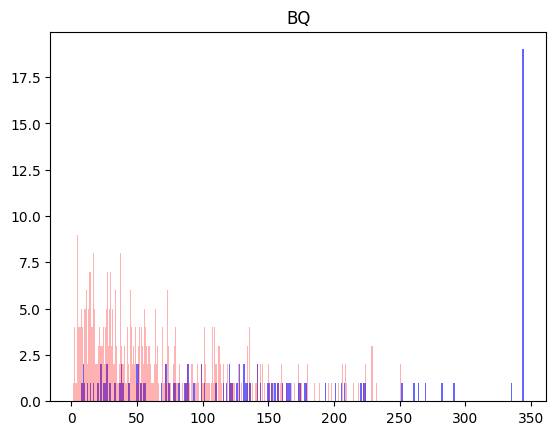

column:  BQ
class 1 dropped: Series([], Name: BQ, dtype: float64)
class 0 dropped: 6      344.644105
17     344.644105
52     344.644105
101    283.645425
102    344.644105
143    321.529940
178    344.644105
194    344.644105
237    344.644105
278    344.644105
309    297.709820
323    265.324460
331    344.644105
335    344.644105
337    344.644105
338    344.644105
360    344.644105
367    344.644105
388    279.883805
397    304.550550
430    329.318890
452    272.548125
455    344.644105
459    320.006015
462    344.644105
468    344.644105
481    301.597782
503    291.517735
504    344.644105
506    344.644105
543    300.322635
553    295.688340
569    270.176272
613    344.644105
Name: BQ, dtype: float64



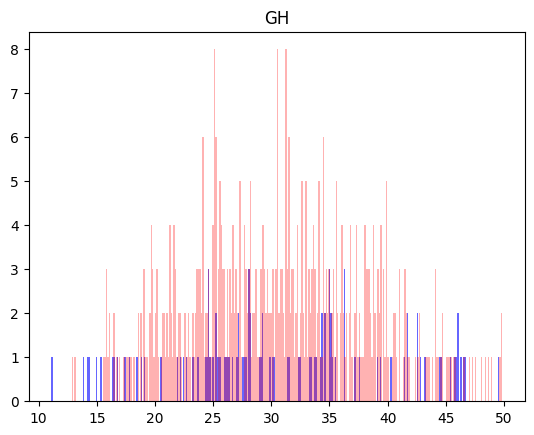

column:  GH
class 1 dropped: 10     81.210825
150    66.016121
232    69.154785
387    65.322155
548    61.761158
Name: GH, dtype: float64
class 0 dropped: 29     12.390930
52      9.432735
86     12.647679
120    11.654172
143    51.974928
167    57.266190
175    52.931225
177    52.670755
197    11.062533
207    53.366582
236    55.000101
244    54.702421
278    51.677248
302    52.600056
310     9.432735
338    52.592614
347    52.559125
388    50.501412
410    52.105163
414    62.475590
427    51.223286
453    61.028121
459    53.746124
474    53.548911
507    50.170243
521    58.188998
580    80.537324
600    12.576980
604     9.432735
Name: GH, dtype: float64



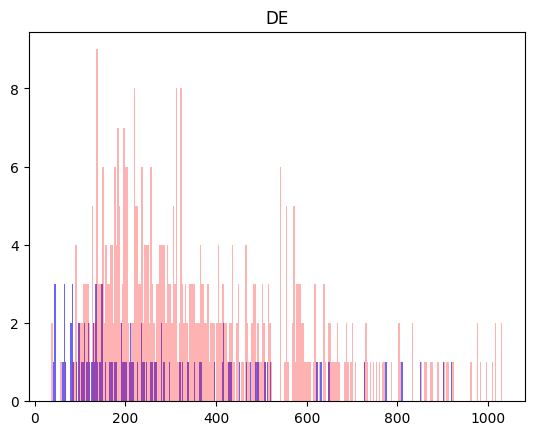

column:  DE
class 1 dropped: 127    1789.420495
238    1187.675260
412     943.723650
500    1346.151115
592    1401.366865
Name: DE, dtype: float64
class 0 dropped: 34     1965.033190
38     1240.797690
52     1105.281830
57     1630.620885
60     1109.668045
113    1496.692755
152    1085.745655
154    2103.405190
176    1323.736625
227    1616.561935
231    1590.643795
252    1323.812020
303    1091.834910
308    1373.781165
322    1082.414970
331    1078.791575
332    1113.287005
392    1233.036440
394    1359.562555
424    1216.445105
435    1269.301435
452    1641.601945
460    1230.269000
488    1574.624575
505    1156.905230
549    1113.109605
580    1294.137435
582    2052.389385
Name: DE, dtype: float64



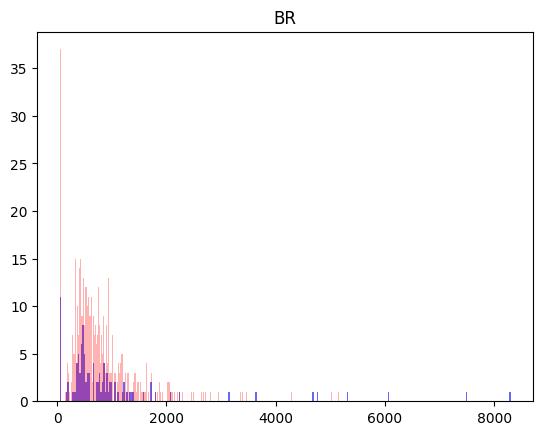

column:  BR
class 1 dropped: 155    179250.2529
Name: BR, dtype: float64
class 0 dropped: 580    57279.39647
Name: BR, dtype: float64



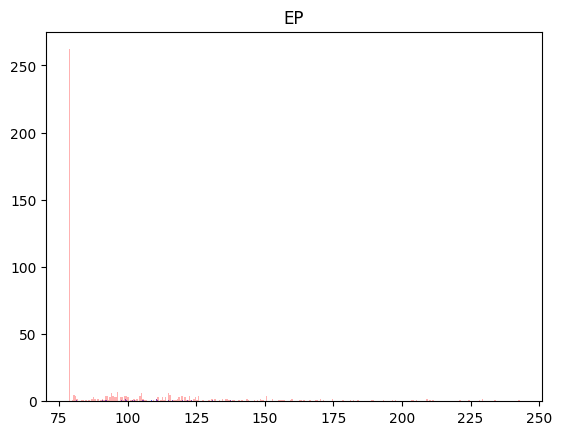

column:  EP
class 1 dropped: 93     158.245002
256    185.213158
258    169.567086
378    155.302095
471    169.604162
509    224.078075
536    156.201188
Name: EP, dtype: float64
class 0 dropped: 14      310.673707
24      304.176138
52     1063.594578
123     309.292626
130     312.648005
156     453.337521
170     268.671234
184     412.053395
212     283.788973
331    1034.170137
Name: EP, dtype: float64



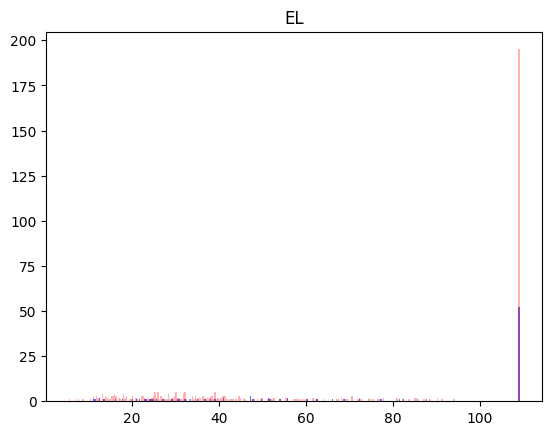

column:  EL
class 1 dropped: Series([], Name: EL, dtype: float64)
class 0 dropped: Series([], Name: EL, dtype: float64)



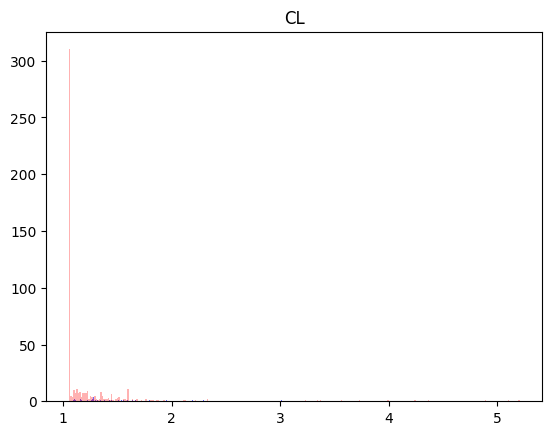

column:  CL
class 1 dropped: 344    17.109120
391     6.205875
408     5.461170
Name: CL, dtype: float64
class 0 dropped: 52     24.842595
103    14.283060
184     5.728500
237    15.034130
331    31.688153
Name: CL, dtype: float64



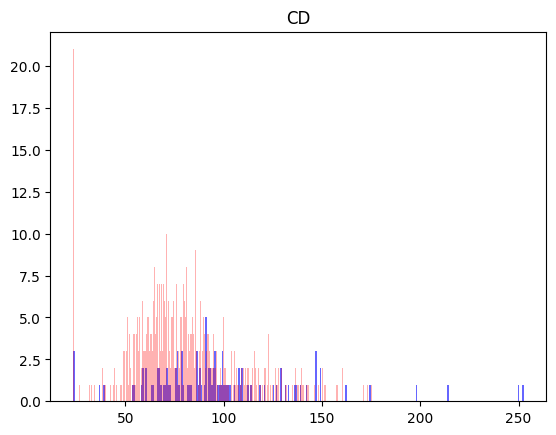

column:  CD
class 1 dropped: 109    260.969940
229    260.751920
330    633.534408
368    291.449136
413    274.617992
Name: CD, dtype: float64
class 0 dropped: 15     373.115464
29     254.924840
45     210.837232
104    177.111520
119    385.388008
278    283.703480
279    275.759624
285    189.415776
310    263.273024
335    485.169816
374    177.880536
386    196.709536
396    223.125632
447    198.057296
449    179.038024
581    199.385236
583    199.650824
603    206.714672
616    271.240664
Name: CD, dtype: float64



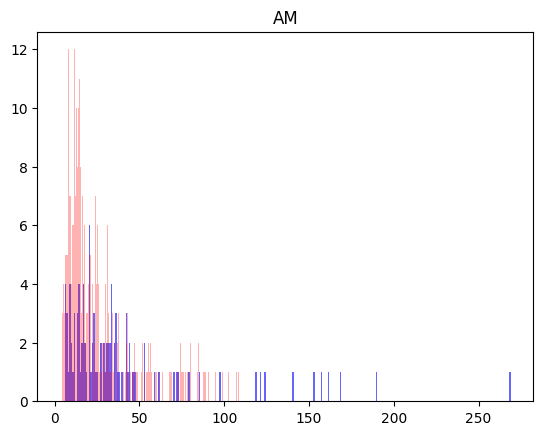

column:  AM
class 1 dropped: 75     630.518230
165    391.755015
357    630.518230
378    630.518230
470    414.084385
526    630.518230
530    584.688824
Name: AM, dtype: float64
class 0 dropped: 34     126.704464
45     124.242349
194    200.976718
270    113.124119
281    149.318758
285    121.510795
310    123.573397
356    630.518230
386    213.260968
411    146.190788
428    145.589970
447    119.150881
462    111.922483
498    196.938230
616    112.006102
Name: AM, dtype: float64



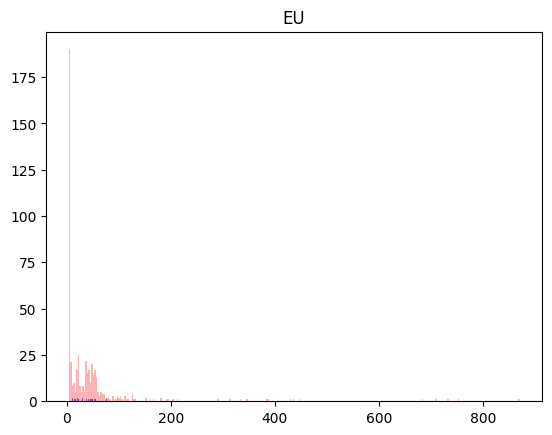

column:  EU
class 1 dropped: 76     273.506640
330    132.899616
412    271.167072
Name: EU, dtype: float64
class 0 dropped: 33     6501.264480
63     6501.264480
135    1177.805376
565    2302.714740
Name: EU, dtype: float64



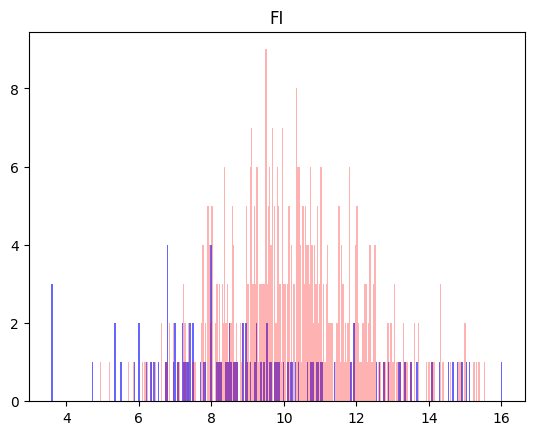

column:  FI
class 1 dropped: 10    35.851039
Name: FI, dtype: float64
class 0 dropped: 14      3.583450
28     17.660895
62      3.583450
72      3.583450
89     16.583104
92      3.583450
111     3.583450
112     3.583450
144    17.421080
152    16.610669
163     3.583450
174     4.542712
175    18.203926
203     3.583450
207    20.817088
212     3.583450
224     3.583450
246    16.274376
299     3.583450
303    16.842215
322    16.108986
325    20.817088
327     3.583450
354    17.762886
381    15.866414
393    20.949400
409     3.583450
445     3.583450
453     3.583450
512    16.048343
521    16.384636
524     3.583450
531     3.583450
533    21.517239
535     3.583450
543     3.583450
554    19.323065
558     3.583450
593    16.395662
599    16.682338
610     3.583450
Name: FI, dtype: float64



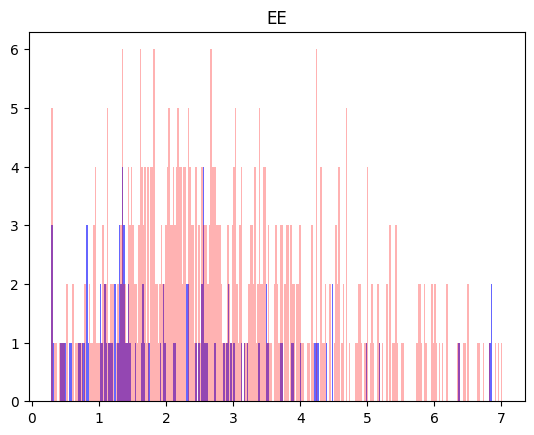

column:  EE
class 1 dropped: 32     18.324926
127     7.429133
391     7.207428
Name: EE, dtype: float64
class 0 dropped: 2       8.146651
52     12.197806
113    10.061376
116     9.476881
125     8.424790
158     7.481536
169    10.815173
260     8.767425
284    11.560908
292    15.499195
305     8.098279
316     7.445257
331     9.428509
346     8.255488
363    11.101374
464     7.848357
472     8.255488
561     7.820140
562     9.888043
568     7.844326
572     9.041533
Name: EE, dtype: float64



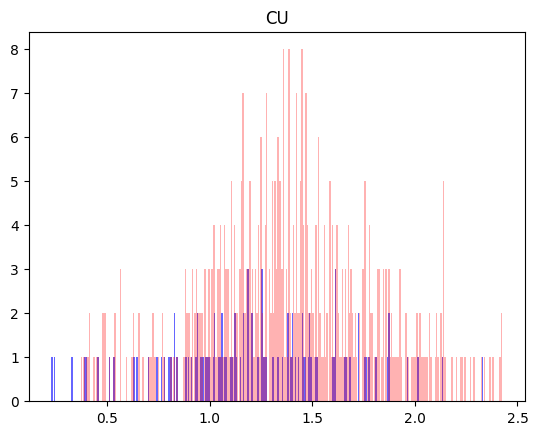

column:  CU
class 1 dropped: 10     2.626092
91     3.266064
378    2.637126
387    2.879874
548    3.095037
Name: CU, dtype: float64
class 0 dropped: 6      2.786085
17     0.297918
64     3.210894
105    4.951507
132    0.319986
133    2.918493
138    0.308952
206    2.648160
223    2.543337
237    2.962629
263    3.503295
276    0.209646
277    2.576439
303    3.095037
326    0.237231
331    2.675745
365    3.255030
392    2.565405
396    2.802636
424    0.253782
426    0.148959
489    0.264816
505    0.308952
532    0.226197
539    0.137925
573    3.122622
Name: CU, dtype: float64



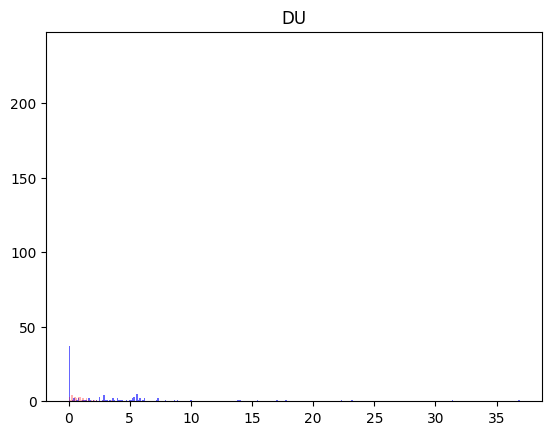

column:  DU
class 1 dropped: 32     136.132986
511    161.355315
Name: DU, dtype: float64
class 0 dropped: 61      3.917496
102     4.917561
121     9.676491
158     5.193441
167     8.138460
190     8.283297
195     5.227926
287     6.083154
292     5.138265
325     7.228056
367    10.911054
380     5.193441
462    12.766347
468    13.897455
469     4.565814
498     5.917626
514     8.421237
521     5.048604
556     4.096818
586    10.317912
Name: DU, dtype: float64



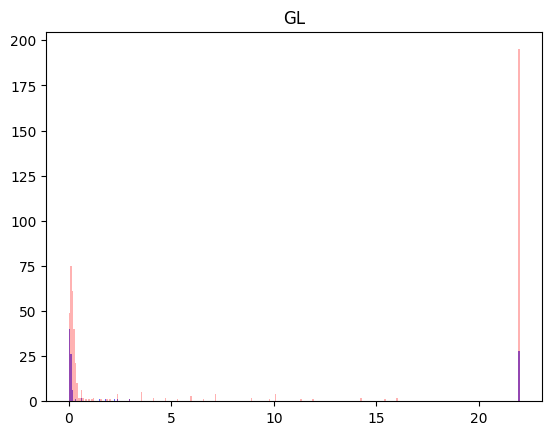

column:  GL
class 1 dropped: Series([], Name: GL, dtype: float64)
class 0 dropped: Series([], Name: GL, dtype: float64)



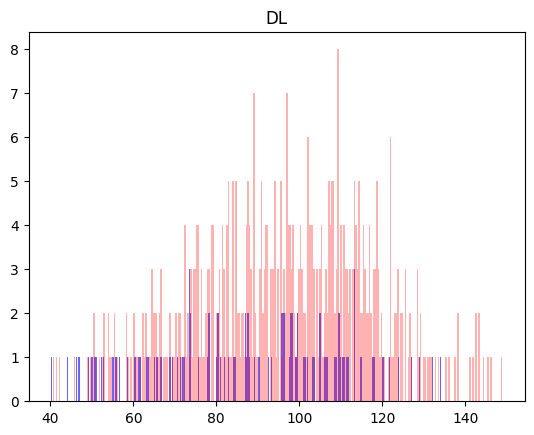

column:  DL
class 1 dropped: 415    34.83584
433    17.16564
434    10.34560
Name: DL, dtype: float64
class 0 dropped: 26      10.34560
132     37.84412
242     24.07260
276     32.03320
325    228.72044
337    222.12724
338    239.20172
410     10.34560
426     28.98888
450     10.34560
461     33.36032
495    205.13332
510    163.11916
539     10.34560
550    175.37064
593    205.54460
614    326.23620
Name: DL, dtype: float64



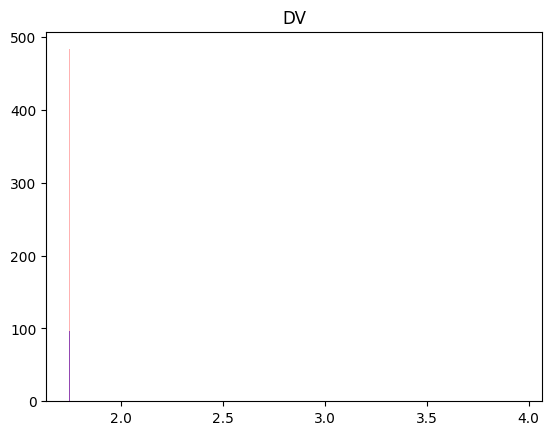

column:  DV
class 1 dropped: 307    5.080285
344    8.976940
408    7.005950
412    4.954670
Name: DV, dtype: float64
class 0 dropped: 52     25.19293
103    10.91426
184     6.61745
237     7.67417
331    24.94947
558     5.84822
Name: DV, dtype: float64



In [3]:

for col in cols:
    col_class1 = class1[col]
    col_class2 = class2[col]
    col_class1_mean = col_class1.mean()
    col_class1_std = col_class1.std()
    col_class2_mean = col_class2.mean()
    col_class2_std = col_class2.std()
    col_class1_dropped = col_class1[(col_class1 < col_class1_mean - 2 * col_class1_std) | (col_class1 > col_class1_mean + 2 * col_class1_std)]
    col_class2_dropped = col_class2[(col_class2 < col_class2_mean - 2 * col_class2_std) | (col_class2 > col_class2_mean + 2 * col_class2_std)]
    col_class1 = col_class1[(col_class1 > col_class1_mean - 2 * col_class1_std) & (col_class1 < col_class1_mean + 2 * col_class1_std)]
    col_class2 = col_class2[(col_class2 > col_class2_mean - 2 * col_class2_std) & (col_class2 < col_class2_mean + 2 * col_class2_std)]
    plt.hist(col_class1, bins=300, color='blue', alpha=.6)
    plt.hist(col_class2, bins=300, color='red', alpha=0.3)
    plt.title(col)
    plt.show()
    print("column:  " + col)
    print("class 1 dropped: " + str(col_class1_dropped))
    print("class 0 dropped: " + str(col_class2_dropped))
    print()